In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import trange

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("datasets/MNIST_data/",one_hot=True)

Extracting datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


Training image data: (55000, 784)
Validation image data: (5000, 784)
Testing image data: (10000, 784)
28 x 28 = 784

Test Labels: (10000, 10)
Label distribution:[(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]

Train image 1 is labelled one-hot as [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


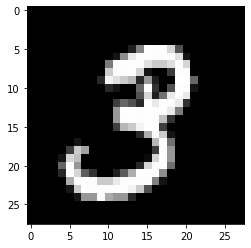

In [5]:
# Dataset statistics
print('Training image data: {0}'.format(mnist.train.images.shape))
print('Validation image data: {0}'.format(mnist.validation.images.shape))
print('Testing image data: {0}'.format(mnist.test.images.shape))
print('28 x 28 = {0}'.format(28*28))

print('\nTest Labels: {0}'.format(mnist.test.labels.shape))
labels = np.arange(10)
num_labels = np.sum(mnist.test.labels, axis=0, dtype=np.int)
print('Label distribution:{0}'.format(list(zip(labels, num_labels))))

# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(mnist.train.labels[1,:]))
image = np.reshape(mnist.train.images[1,:],[28,28])
plt.imshow(image, cmap='gray')

In [6]:
# Define input placeholder
x = tf.placeholder(tf.float32, [None, 784])

In [7]:
# Define linear transformation
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [8]:
# Softmax to probabilities
py = tf.nn.softmax(y)

In [9]:
# Define labels placeholder
y_ = tf.placeholder(tf.float32, [None, 10])

In [10]:
# Loss
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(py), reduction_indices=[1]))

In [11]:
# Optimizer
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [12]:
# Create a session object and initialize all graph variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [13]:
# Train the model
# trange is a tqdm function. It's the same as range, but adds a pretty progress bar
for _ in trange(1000): 
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 379.30it/s]


In [14]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(py, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

Test accuracy: 0.9013000130653381


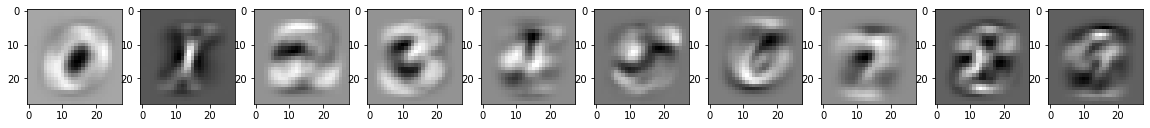

In [15]:
# Get weights
weights = sess.run(W)

fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    ax[digit].imshow(weights[:,digit].reshape(28,28), cmap='gray')

# Close session to finish
sess.close()